In [1]:
pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train,y_train), (x_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
len(x_train)

60000

In [5]:
x_train = x_train/255
x_test = x_test/255

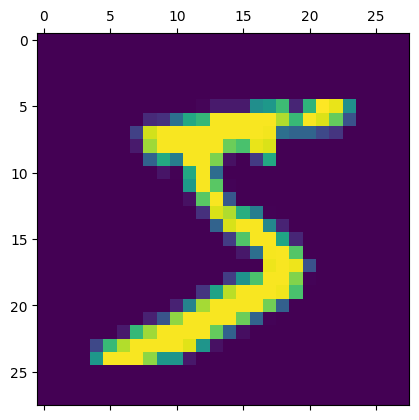

In [6]:
plt.matshow(x_train[0])

In [7]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [8]:
x_test_flattened.shape

(10000, 784)

In [9]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [10]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened,y_train,epochs=20)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8163 - loss: 0.7209
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9112 - loss: 0.3164
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9203 - loss: 0.2853
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9220 - loss: 0.2701
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9260 - loss: 0.2661
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9272 - loss: 0.2593
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9286 - loss: 0.2584
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9302 - loss: 0.2477
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9311 - loss: 0.2483
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9322 - loss: 0.2505
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9328 - loss: 0.2453
Epoch 12/20
1875/1875 ━━━━━━━

In [11]:
model.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9164 - loss: 0.3018


[0.2677213251590729, 0.9279999732971191]

In [12]:
prediction = model.predict(x_test_flattened)
prediction[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([2.4667979e-04, 4.4862675e-10, 1.6750011e-03, 9.6143943e-01,
       8.8240782e-04, 1.1881213e-01, 3.1376715e-10, 9.9987173e-01,
       7.4432157e-02, 6.4375859e-01], dtype=float32)

In [13]:
np.argmax(prediction[5])

1

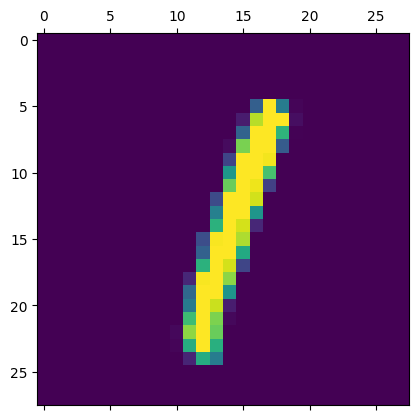

In [14]:
plt.matshow(x_test[5])

In [15]:
y_predicted_labels = [np.argmax(i) for i in prediction]

In [16]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [17]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [18]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

In [19]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    1,    2,    1,    6,    6,    3,    1,    0],
       [   0, 1113,    4,    1,    0,    1,    4,    2,   10,    0],
       [   6,    8,  931,   14,    8,    3,   11,   10,   38,    3],
       [   3,    0,   25,  906,    1,   27,    2,   10,   29,    7],
       [   1,    1,    7,    1,  918,    0,    9,    4,   10,   31],
       [   8,    2,    2,   29,    9,  780,   13,    9,   34,    6],
       [  11,    3,    8,    1,    7,   11,  914,    1,    2,    0],
       [   1,    6,   26,    4,    5,    1,    0,  946,    3,   36],
       [   7,    9,    6,   15,    9,   20,    5,   10,  883,   10],
       [   9,    8,    1,    7,   23,    7,    0,   17,    8,  929]],
      dtype=int32)>

In [20]:
pip install seaborn

<function matplotlib.pyplot.show(close=None, block=None)>

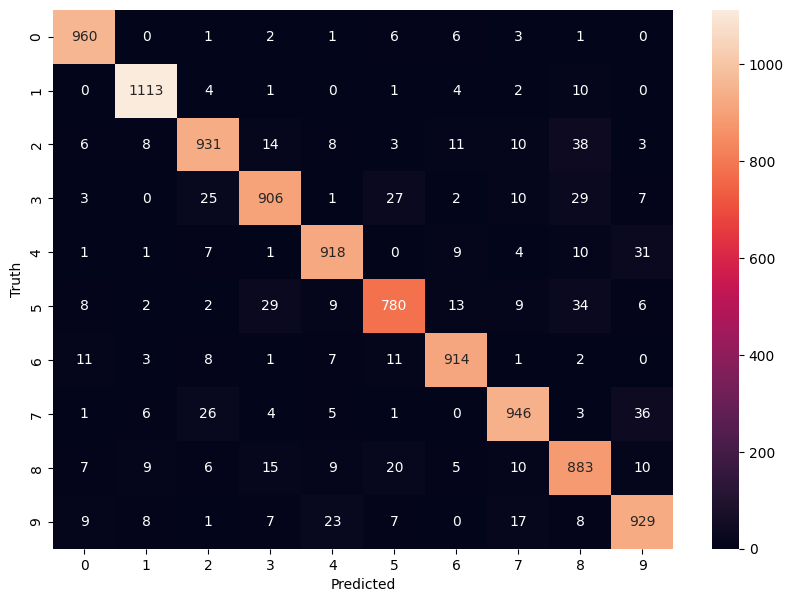

In [21]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show

In [22]:
model2 = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model2.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model2.fit(x_train_flattened,y_train,epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.8673 - loss: 0.4326
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9651 - loss: 0.1129
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9751 - loss: 0.0795
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9809 - loss: 0.0586
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9848 - loss: 0.0479


In [23]:
model2.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9696 - loss: 0.1025


[0.08587446808815002, 0.9753999710083008]

In [24]:
prediction2 = model2.predict(x_test_flattened)
prediction2[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([3.0951353e-03, 1.2207461e-01, 3.9033839e-01, 3.5117868e-01,
       1.6079372e-02, 4.2081449e-02, 1.3022972e-07, 9.9999940e-01,
       3.8462138e-04, 4.4702375e-01], dtype=float32)

In [25]:
np.argmax(prediction[5])

1

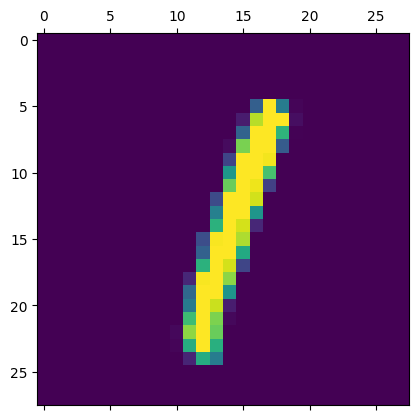

In [26]:
plt.matshow(x_test[5])

In [27]:
y_predicted_labels2 = [np.argmax(i) for i in prediction2]

In [28]:
cm2 = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels2)
cm2

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    1,    0,    1,    1,    2,    5,    3,    2,    1],
       [   0, 1124,    3,    1,    0,    0,    1,    2,    4,    0],
       [   4,    1, 1000,    9,    3,    0,    1,    6,    6,    2],
       [   0,    0,    4,  984,    0,   15,    0,    5,    2,    0],
       [   1,    0,    0,    0,  947,    0,    7,    2,    1,   24],
       [   1,    0,    1,    6,    1,  872,    4,    1,    5,    1],
       [   1,    3,    0,    0,    5,    5,  941,    0,    3,    0],
       [   0,    0,   11,    0,    0,    0,    0, 1012,    2,    3],
       [   1,    0,    5,   13,    5,   10,    1,    3,  933,    3],
       [   2,    4,    0,    8,    3,    7,    0,    8,    0,  977]],
      dtype=int32)>

<function matplotlib.pyplot.show(close=None, block=None)>

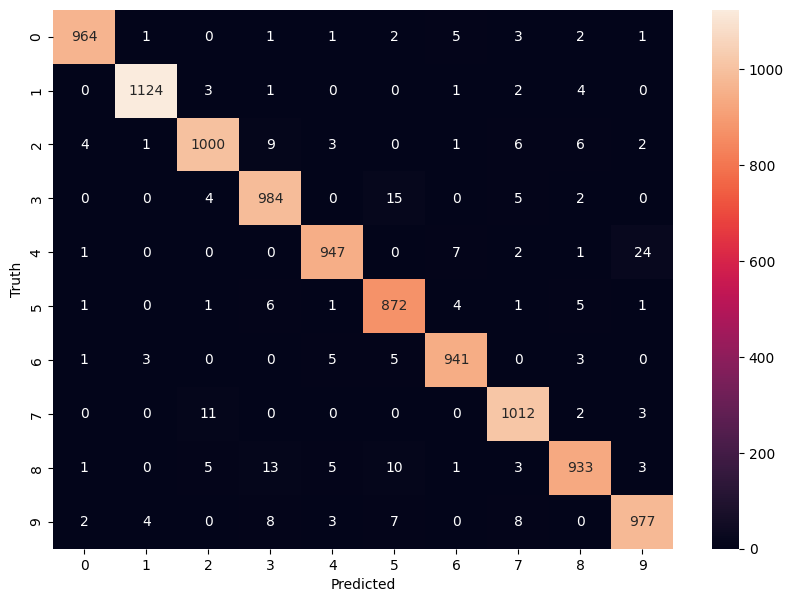

In [29]:
plt.figure(figsize=(10,7))
sn.heatmap(cm2, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show

In [30]:
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model3.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model3.fit(x_train,y_train,epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8690 - loss: 0.4344
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9672 - loss: 0.1068
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9757 - loss: 0.0777
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9827 - loss: 0.0543
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9868 - loss: 0.0427


In [31]:
model3.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9686 - loss: 0.1003


[0.08273539692163467, 0.9761999845504761]